In [1]:
import os
from linares_plot import *
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
### Aprox. 10.000.000 de rows 
### Takes about 40min to load
### path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates_100' ##sliding window of 100
### path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates_10' ##sliding window of 10
path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates'  ##sliding window of 10
files = os.listdir(path_)
frames=[]
for f in files:
    fx=pd.read_excel( os.path.join(path_,f))
    print(f)
    frames.append(fx)
#
df=pd.concat(frames)

1364705.xlsx
1365201.xlsx
1365301.xlsx
1365501.xlsx
1365701.xlsx
1365802.xlsx
1365902.xlsx
1366002.xlsx
1366101.xlsx
1367701.xlsx
1367802.xlsx
1367903.xlsx
1369702.xlsx
1369901.xlsx
1370002.xlsx
1370202.xlsx
1371202.xlsx
1371901.xlsx
1372003.xlsx
1372301.xlsx
1372402.xlsx
189139306.xlsx
1891406.xlsx
1891407.xlsx
189141804.xlsx
1891421.xlsx
1891436.xlsx
189144701.xlsx
189144904.xlsx
189147105.xlsx
189150602.xlsx
189151102.xlsx
189152601.xlsx
189154404.xlsx
189154602.xlsx
189155501.xlsx
189156205.xlsx
189157901.xlsx
189158601.xlsx
1891598.xlsx
189160302.xlsx
189160702.xlsx
189161604.xlsx
1891626.xlsx
189163101.xlsx
189163701.xlsx
189164103.xlsx
189164404.xlsx
189164801.xlsx
189164803.xlsx
189165003.xlsx
1891653.xlsx
189168701.xlsx
189169502.xlsx
189171003.xlsx
189171602.xlsx
189172801.xlsx
189173101.xlsx
189173801.xlsx
189174201.xlsx
189175201.xlsx
189175801.xlsx
189176101.xlsx
189176501.xlsx
189176901.xlsx
189177402.xlsx
189177701.xlsx
1891783.xlsx
189179001.xlsx
189179002.xlsx
1891793.

In [3]:
df.head()

Unnamed: 0  firing_gauss  times  trial  TDOA  TDconf  targetloc  distLoc  \
0           0      0.025193      0      0   800       1          0        1   
1           1      0.025486     10      0   800       1          0        1   
2           2      0.018175     20      0   800       1          0        1   
3           3      0.015012     30      0   800       1          0        1   
4           4      0.024514     40      0   800       1          0        1   

   fixationtime  perfromance_code  saccadeChoice  cueDuration  distDur monkey  \
0           500                 1              0          100      100   Mojo   
1           500                 1              0          100      100   Mojo   
2           500                 1              0          100      100   Mojo   
3           500                 1              0          100      100   Mojo   
4           500                 1              0          100      100   Mojo   

    neuron brain_region  rf_loc  performance  norm_firing_gauss  time_centered  
0  1364705          LIP     135            1           0.846866           -500  
1  1364705          LIP     135            1           0.856722           -490  
2  1364705          LIP     135            1           0.610950           -480  
3  1364705          LIP     135            1           0.504622           -470  
4  1364705          LIP     135            1           0.824021           -460

In [4]:
df.performance.unique()

array([1, 0], dtype=int64)

In [5]:
len(df)

17518400

## LIP

In [74]:
df_control_lip = df.loc[(df['TDconf']==0) & (df['brain_region']=='LIP') ]
df_near_100_lip = df.loc[(df['TDconf']==3) & (df['brain_region']=='LIP') & (df['TDOA']==0) ]
df_near_200_lip = df.loc[(df['TDconf']==3) & (df['brain_region']=='LIP') & (df['TDOA']==100) ]
df_near_300_lip = df.loc[(df['TDconf']==3) & (df['brain_region']=='LIP') & (df['TDOA']==200)]
df_near_900_lip = df.loc[(df['TDconf']==3) & (df['brain_region']=='LIP') & (df['TDOA']==800)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


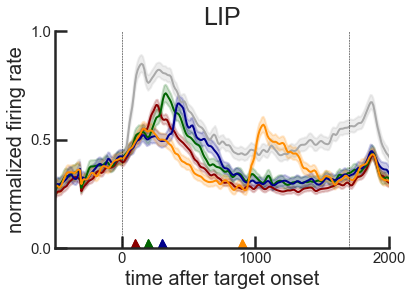

In [75]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_lip, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_100_lip, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_200_lip, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_300_lip, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_900_lip, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('LIP', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [76]:
df_control_lip = df.loc[(df['TDconf']==0) & (df['brain_region']=='LIP') ]
df_far_100_lip = df.loc[(df['TDconf']==4) & (df['brain_region']=='LIP') & (df['TDOA']==0) ]
df_far_200_lip = df.loc[(df['TDconf']==4) & (df['brain_region']=='LIP') & (df['TDOA']==100) ]
df_far_300_lip = df.loc[(df['TDconf']==4) & (df['brain_region']=='LIP') & (df['TDOA']==200)]
df_far_900_lip = df.loc[(df['TDconf']==4) & (df['brain_region']=='LIP') & (df['TDOA']==800)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


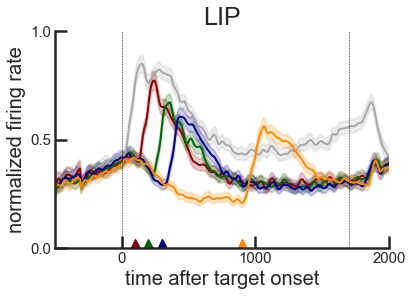

In [77]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_lip, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_100_lip, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_200_lip, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_300_lip, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_900_lip, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('LIP', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

## DLPFC

In [78]:
df_control_pfc = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') ]
df_near_100_pfc = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]
df_near_200_pfc = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['TDOA']==100) ]
df_near_300_pfc = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['TDOA']==200)]
df_near_900_pfc = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['TDOA']==800)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


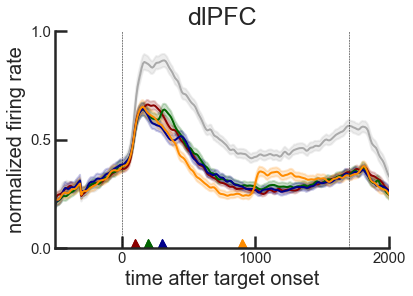

In [79]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_100_pfc, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_200_pfc, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_300_pfc, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_900_pfc, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [80]:
df_control_pfc = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') ]
df_far_100_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]
df_far_200_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==100) ]
df_far_300_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==200)]
df_far_900_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==800)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


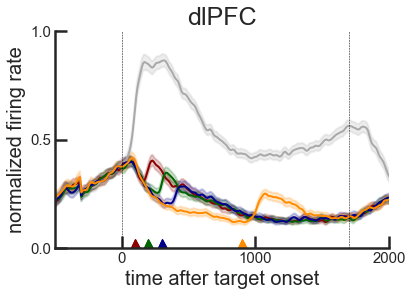

In [81]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_100_pfc, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_200_pfc, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_300_pfc, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_900_pfc, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

### Subset for cross-temporal decoding

In [125]:
def reduce_df(df, w_size=100, max_=2100):
    windows_st = np.arange(0,max_, w_size)
    windows_end = np.arange(w_size, max_+w_size, w_size)
    windows_end
    ####
    frames=[]
    for Neuron in df.neuron.unique():
        df_NE = df.loc[df['neuron']==Neuron]
        for trial in df_NE.trial.unique():
            df_TR = df_NE.loc[df_NE['trial']==trial]
            mean_=[]
            times_=[]
            for idx_, wst in enumerate(windows_st):
                mean_FR = df_TR.loc[(df_TR['times'] >= wst) & (df_TR['times'] < windows_end[idx_]), 'firing_gauss' ].mean()
                mean_.append(mean_FR)
                times_.append(wst)

            dfx = pd.DataFrame({'firing':mean_, 'times':times_})
            dfx['trial']=df_TR.iloc[0].trial
            dfx['TDOA']=df_TR.iloc[0].TDOA
            dfx['TDconf']=df_TR.iloc[0].TDconf
            dfx['targetloc']=df_TR.iloc[0].targetloc
            dfx['distLoc']=df_TR.iloc[0].distLoc
            dfx['fixationtime']=df_TR.iloc[0].fixationtime
            dfx['failed']=df_TR.iloc[0].failed
            dfx['saccadeChoice']=df_TR.iloc[0].saccadeChoice
            dfx['monkey']=df_TR.iloc[0].monkey
            dfx['neuron']=df_TR.iloc[0].neuron
            dfx['brain_region']=df_TR.iloc[0].brain_region
            dfx['rf_loc']=df_TR.iloc[0].rf_loc
            
            ##### convert target_loc to angle (0-360)
            rf = df_TR.iloc[0].rf_loc  ##0-360
            targloc = df_TR.iloc[0].targetloc ##0-7
            if targloc == 0: #receptive field
                angle_target = rf
            else : #displaced ccw
                angle_target = rf + (targloc*45)

            if angle_target>360:
                angle_target = angle_target - 360
            
            dfx['target_angle']=angle_target

            
            
            frames.append(dfx)
        #
    #
    df_reduced=pd.concat(frames)
    return df_reduced


In [126]:
### The conditions I am interested in for the cross-temporal decoding are the 0 and the 1
## T in RF, no D (0)
## T in RF, near D (1) (where I can see more effect of the distractor)

In [129]:
path_CTD = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\CTD'

In [130]:
### df_control_pfc = df.loc[(df['distLoc']==99) & (df['brain_region']=='DLPFC') ] no interest. In controls target always in RF
df_100_pfc = df.loc[ (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]
df_200_pfc = df.loc[ (df['brain_region']=='DLPFC') & (df['TDOA']==100) ]
df_300_pfc = df.loc[ (df['brain_region']=='DLPFC') & (df['TDOA']==200)]
df_900_pfc = df.loc[ (df['brain_region']=='DLPFC') & (df['TDOA']==800)]

In [131]:
pfc_100 = reduce_df(df_100_pfc)
print('100')
pfc_200 = reduce_df(df_200_pfc)
print('200')
pfc_300 = reduce_df(df_300_pfc)
print('300')
pfc_900 = reduce_df(df_900_pfc)
print('900')

100
200
300
900


In [132]:
pfc_100.to_excel( os.path.join(path_CTD, 'pfc_100.xlsx'))
pfc_200.to_excel( os.path.join(path_CTD, 'pfc_200.xlsx'))
pfc_300.to_excel( os.path.join(path_CTD, 'pfc_300.xlsx'))
pfc_900.to_excel( os.path.join(path_CTD, 'pfc_900.xlsx'))

In [133]:
#df_control_lip = df.loc[(df['distLoc']==99) & (df['brain_region']=='LIP') ]
df_100_lip = df.loc[ (df['brain_region']=='LIP') & (df['TDOA']==0) ]
df_200_lip = df.loc[ (df['brain_region']=='LIP') & (df['TDOA']==100) ]
df_300_lip = df.loc[ (df['brain_region']=='LIP') & (df['TDOA']==200)]
df_900_lip = df.loc[ (df['brain_region']=='LIP') & (df['TDOA']==800)]

In [134]:
lip_100 = reduce_df(df_100_lip)
print('100')
lip_200 = reduce_df(df_200_lip)
print('200')
lip_300 = reduce_df(df_300_lip)
print('300')
lip_900 = reduce_df(df_900_lip)
print('900')

100
200
300
900


In [135]:
lip_100.to_excel( os.path.join(path_CTD, 'lip_100.xlsx'))
lip_200.to_excel( os.path.join(path_CTD, 'lip_200.xlsx'))
lip_300.to_excel( os.path.join(path_CTD, 'lip_300.xlsx'))
lip_900.to_excel( os.path.join(path_CTD, 'lip_900.xlsx'))

In [149]:
neuro = df_far_300_pfc.neuron.unique()

In [169]:
a= [1367903,  1369901,   1372003,   1372402, 189168701, 189171003, 189173101, 189174201, 189175801, 189176501, 189176901,   1891783,
       189179702, 189180001, 189181001, 189181502, 189182901, 189183402,
         1891857, 189189601, 189192001, 189194301, 189196301, 189209101,
       189210901]

In [287]:
# df_control_pfc = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') ]
# df_100_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]
# df_200_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==100) ]
# df_300_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==200)]
# df_900_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==800)]

df_control_pfc = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') ]
df_100_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]
df_200_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==100) ]
df_300_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==200)]
df_900_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==800)]

In [288]:
## 100

In [289]:
parb_neg_neurons_100 = [  1367903,   1372402, 189168701, 189171003, 189171602, 189173101,
       189176501, 189179702, 189181001,   1891819,   1891857, 189188901,
       189189601, 189191601, 189191602,   1891935, 189194301, 189196301,
       189196401, 189210901]

linear_n_100 = [  1367701,   1371202, 189169502, 189172801, 189174201, 189175201,
       189175801, 189176901,   1891783, 189179002,   1891793, 189182202,
       189182901, 189184601, 189192001, 189192201]

df_100_pfc1 = df_100_pfc.loc[~df_100_pfc['neuron'].isin(parb_neg_neurons_100)]
df_100_pfc2 = df_100_pfc.loc[df_100_pfc['neuron'].isin(parb_neg_neurons_100)]
df_100_pfc3 = df_100_pfc.loc[df_100_pfc['neuron'].isin(linear_n_100)]



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


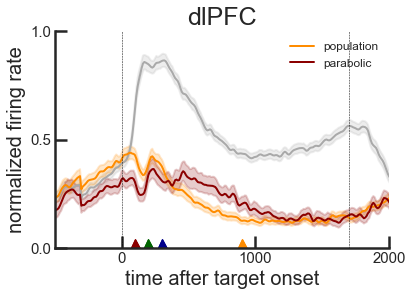

In [290]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc1, color='darkorange', linewidth=2, label='population')
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc2, color='darkred', linewidth=2, label='parabolic')
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc3, color='darkblue', linewidth=2, label='linear')
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)
plt.legend(loc=1, frameon=False, prop={'size': 12})


plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [291]:
### 200

In [292]:
parb_neg_neurons_200 = [  1367802,   1369702,   1370002, 189168701, 189173101, 189174201,
       189176501, 189176901, 189179702, 189180001, 189182202, 189188901,
       189196301, 189209101, 189210001]

linear_n_200 = [  1367701,   1367903,   1371202,   1372402, 189169502, 189175201,
       189177402,   1891783,   1891793, 189181001,   1891819, 189182901,
       189189601, 189192001, 189192201,   1891935, 189194301, 189209503]

df_200_pfc1 = df_200_pfc.loc[~df_200_pfc['neuron'].isin(parb_neg_neurons_200)]
df_200_pfc2 = df_200_pfc.loc[df_200_pfc['neuron'].isin(parb_neg_neurons_200)]
df_200_pfc3 = df_200_pfc.loc[df_200_pfc['neuron'].isin(linear_n_200)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


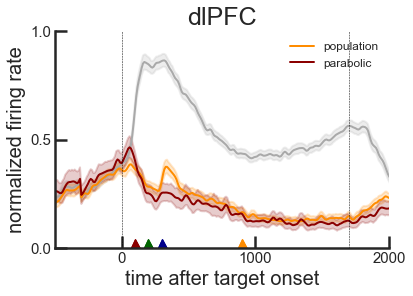

In [293]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_200_pfc1, color='darkorange', linewidth=2, label='population')
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_200_pfc2, color='darkred', linewidth=2, label='parabolic')
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_200_pfc3, color='darkblue', linewidth=2, label='linear')
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)
plt.legend(loc=1, frameon=False, prop={'size': 12})


plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [294]:
### 300

In [295]:
parb_neg_neurons_300 = [189168701, 189173101, 189174201, 189175801, 189176901,   1891783,
       189179702, 189181001,   1891857, 189188901, 189189601, 189192001,
       189195301, 189196301, 189209101, 189210001, 189210901]

linear_n_300 = [  1367701,   1369901,   1370202,   1372003,   1372402, 189169502,
       189171602, 189173801, 189175201, 189177701,   1891793, 189181502,
         1891819, 189184601, 189187301, 189191601, 189191602, 189192201,
       189196401]

df_300_pfc1 = df_300_pfc.loc[~df_300_pfc['neuron'].isin(parb_neg_neurons_300)]
df_300_pfc2 = df_300_pfc.loc[df_300_pfc['neuron'].isin(parb_neg_neurons_300)]
df_300_pfc3 = df_300_pfc.loc[df_300_pfc['neuron'].isin(linear_n_300)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


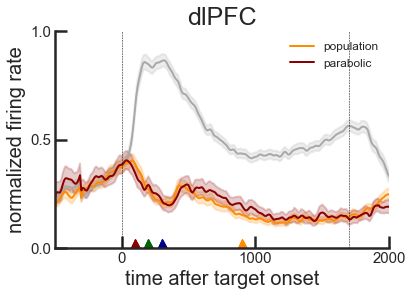

In [296]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_300_pfc1, color='darkorange', linewidth=2, label='population')
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_300_pfc2, color='darkred', linewidth=2, label='parabolic')
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_300_pfc3, color='darkblue', linewidth=2, label='linear')
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)
plt.legend(loc=1, frameon=False, prop={'size': 12})


plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [297]:
### 900

In [298]:
parb_neg_neurons_900 = [  1367903,   1369901,   1372003,   1372402, 189168701, 189171003,
       189173101, 189174201, 189175801, 189176501, 189176901,   1891783,
       189179702, 189180001, 189181001, 189181502, 189182901, 189183402,
         1891857, 189189601, 189192001, 189194301, 189196301, 189209101,
       189210901]

linear_n_900 = [  1371202,   1371901, 189171602, 189175201, 189177402, 189177701,
         1891793,   1891819,   1891841, 189187301, 189188901, 189192201,
       189196401, 189209503, 189210001]


df_900_pfc1 = df_900_pfc.loc[~df_900_pfc['neuron'].isin(parb_neg_neurons_900)]
df_900_pfc2 = df_900_pfc.loc[df_900_pfc['neuron'].isin(parb_neg_neurons_900)]
df_900_pfc3 = df_900_pfc.loc[df_900_pfc['neuron'].isin(linear_n_900)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


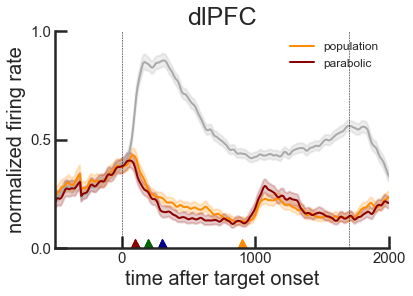

In [299]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_900_pfc1, color='darkorange', linewidth=2, label='population')
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_900_pfc2, color='darkred', linewidth=2, label='parabolic')
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_900_pfc3, color='darkblue', linewidth=2, label='linear')
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)
plt.legend(loc=1, frameon=False, prop={'size': 12})


plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [ ]:
df_100_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]
df_200_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==100) ]
df_300_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==200)]
df_900_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==800)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


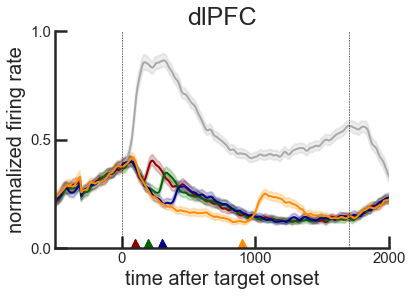

In [211]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_200_pfc, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_300_pfc, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_900_pfc, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [200]:
##subgroup

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


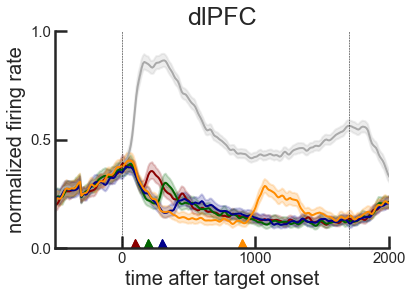

In [212]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc2, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_200_pfc2, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_300_pfc2, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_900_pfc2, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [202]:
#others

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


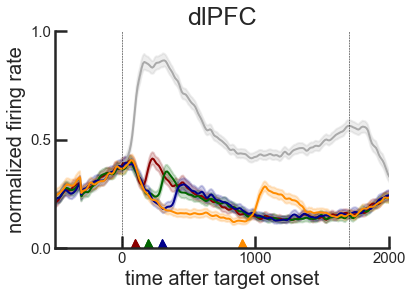

In [213]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc3, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_200_pfc3, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_300_pfc3, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_900_pfc3, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


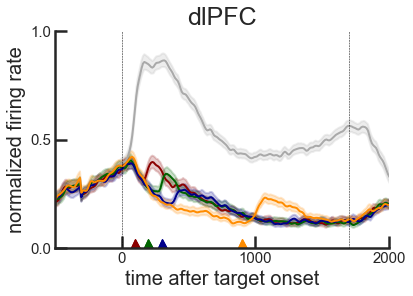

In [214]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc4, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_200_pfc4, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_300_pfc4, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_900_pfc4, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [164]:
df_near_100_pfc2 = df_near_100_pfc.loc[df_near_100_pfc['neuron'].isin(a)]
df_near_200_pfc2 = df_near_200_pfc.loc[df_near_200_pfc['neuron'].isin(a)]
df_near_300_pfc2 = df_near_300_pfc.loc[df_near_300_pfc['neuron'].isin(a)]
df_near_900_pfc2 = df_near_900_pfc.loc[df_near_900_pfc['neuron'].isin(a)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


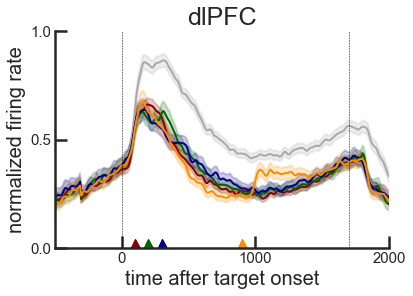

In [165]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_100_pfc2, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_200_pfc2, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_300_pfc2, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_900_pfc2, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [166]:
df_near_100_pfc3 = df_near_100_pfc.loc[~df_near_100_pfc['neuron'].isin(a)]
df_near_200_pfc3 = df_near_200_pfc.loc[~df_near_200_pfc['neuron'].isin(a)]
df_near_300_pfc3 = df_near_300_pfc.loc[~df_near_300_pfc['neuron'].isin(a)]
df_near_900_pfc3 = df_near_900_pfc.loc[~df_near_900_pfc['neuron'].isin(a)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


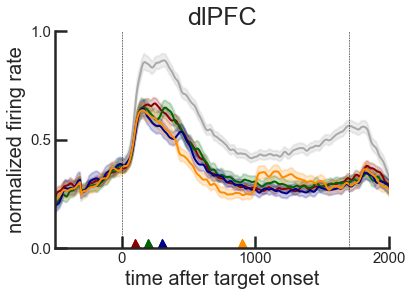

In [168]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_100_pfc3, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_200_pfc3, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_300_pfc3, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_900_pfc3, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [300]:
### Temporal error?

In [ ]:
### target on RF, distractor near, TDOA 100 and 900ms

In [301]:
df_100_pfc = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]
df_900_pfc = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['TDOA']==800)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


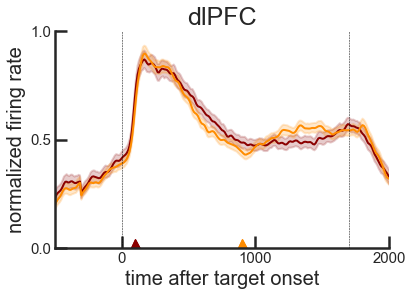

In [302]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_900_pfc, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [ ]:
### No difference in timing of the peak. No temporal order effect (not encoding first the distractor)

In [ ]:
### Es un gradual increase o tenim un DIP
### Firing rate profiles of those with best decoding last 500ms (T in RF, no distractor)

In [306]:
df_pfc_cont = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') ]

less_error_900 = [1367701,   1370202,   1371202,   1372003,   1372402, 189168701,
       189169502, 189171003, 189171602, 189172801, 189173101, 189173801,
       189175201, 189175801, 189176501, 189177402, 189177701,   1891783,
         1891793, 189179702, 189180001, 189181001,   1891819, 189182202,
       189182901, 189183201, 189183402, 189184601,   1891857, 189189601,
       189192001, 189192201, 189196301, 189210001]

df_pfc_cont_less = df_pfc_cont.loc[df_pfc_cont['neuron'].isin(less_error_900)]
df_pfc_cont_more = df_pfc_cont.loc[~df_pfc_cont['neuron'].isin(less_error_900)]


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


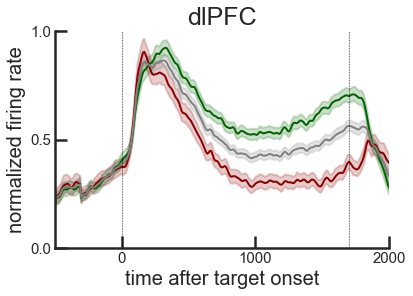

In [307]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_cont_less, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_cont_more, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_cont, color='grey', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

#plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
#plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [ ]:
## Es un dip (la verda es la de menys error y veiem que no "puja de 0")
## No son dos poblaciones diferentes que "hablan"

In [ ]:
#### La diferencia entre good y bad  debería ser mayor en el de TDOA corto?

In [ ]:
[  1367701,   1367802,   1370202,   1371202,   1372003, 189168701,
       189169502, 189171003, 189171602, 189172801, 189173101, 189173801,
       189175201, 189175801, 189176501, 189176901, 189177402, 189177701,
         1891783,   1891793, 189179702, 189180001, 189181001, 189181502,
         1891819, 189182202, 189182901, 189183201, 189183402, 189184601,
         1891857, 189189601, 189192001, 189192201, 189196301, 189196401]

In [ ]:
[  1367701,   1370202,   1371202,   1372003,   1372301,   1372402,
       189168701, 189169502, 189171003, 189171602, 189172801, 189173101,
       189173801, 189174201, 189175201, 189175801, 189176501, 189176901,
       189177402, 189177701,   1891783,   1891793, 189179702, 189180001,
       189181001, 189181502,   1891819, 189182202, 189182901, 189183201,
       189184601, 189187301, 189189601, 189192001, 189192201, 189196301,
       189196401, 189210001]

In [ ]:
#### Qué pregunta estamos intentando mirar??
#### Tenemos un subgrupo de neuronas que presentan un dip?
#### Si ponemos un distractor en este DIP, se reproduce el behaviour?? 
#### La distancia entre correct e incorrect en esta subpoblavion aumenta de acuerdo a behaviour??

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


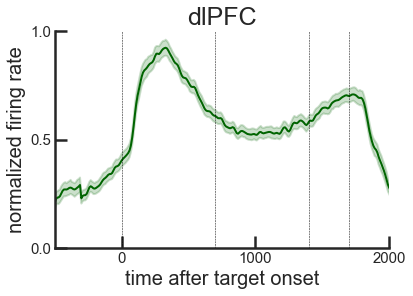

In [310]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_cont_less, color='darkgreen', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)
plt.plot([700,700], [0,1], 'k--', linewidth=0.5)
plt.plot([1400,1400], [0,1], 'k--', linewidth=0.5)

In [311]:
### Coger las neuronas que presentan el DIP 
### Mirar si los cambios de diferencia en el firing se sincroniza con correct incorrect
### Target in RF y el distractor far

In [312]:
df_100_pfc = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]

less_error_900 = [1367701,   1370202,   1371202,   1372003,   1372402, 189168701,
       189169502, 189171003, 189171602, 189172801, 189173101, 189173801,
       189175201, 189175801, 189176501, 189177402, 189177701,   1891783,
         1891793, 189179702, 189180001, 189181001,   1891819, 189182202,
       189182901, 189183201, 189183402, 189184601,   1891857, 189189601,
       189192001, 189192201, 189196301, 189210001]

subset_100_pfc = df_100_pfc.loc[df_100_pfc['neuron'].isin(less_error_900)]

In [314]:
subset_100_pfc.loc[(subset_100_pfc['times']>700) & (subset_100_pfc['times']<1400) ]

Unnamed: 0  firing_gauss  times  trial  TDOA  TDconf  targetloc  \
3181           71      0.068356    710     15     0       2          0   
3182           72      0.072765    720     15     0       2          0   
3183           73      0.081346    730     15     0       2          0   
3184           74      0.075782    740     15     0       2          0   
3185           75      0.063802    750     15     0       2          0   
...           ...           ...    ...    ...   ...     ...        ...   
77204         135      0.039225   1350    421     0       2          0   
77205         136      0.035326   1360    421     0       2          0   
77206         137      0.034194   1370    421     0       2          0   
77207         138      0.034932   1380    421     0       2          0   
77208         139      0.041987   1390    421     0       2          0   

       distLoc  fixationtime  failed  saccadeChoice  cueDuration  distDur  \
3181         3           500       1              0          100      100   
3182         3           500       1              0          100      100   
3183         3           500       1              0          100      100   
3184         3           500       1              0          100      100   
3185         3           500       1              0          100      100   
...        ...           ...     ...            ...          ...      ...   
77204        4           800       1              0          100      100   
77205        4           800       1              0          100      100   
77206        4           800       1              0          100      100   
77207        4           800       1              0          100      100   
77208        4           800       1              0          100      100   

          monkey     neuron brain_region  rf_loc  norm_firing_gauss  \
3181        Mojo    1367701        DLPFC     270           0.392679   
3182        Mojo    1367701        DLPFC     270           0.418010   
3183        Mojo    1367701        DLPFC     270           0.467304   
3184        Mojo    1367701        DLPFC     270           0.435338   
3185        Mojo    1367701        DLPFC     270           0.366519   
...          ...        ...          ...     ...                ...   
77204  Speriatus  189210001        DLPFC     315           0.350028   
77205  Speriatus  189210001        DLPFC     315           0.315235   
77206  Speriatus  189210001        DLPFC     315           0.305137   
77207  Speriatus  189210001        DLPFC     315           0.311719   
77208  Speriatus  189210001        DLPFC     315           0.374681   

       time_centered  
3181             210  
3182             220  
3183             230  
3184             240  
3185             250  
...              ...  
77204            550  
77205            560  
77206            570  
77207            580  
77208            590  

[38791 rows x 19 columns]

In [ ]:
### Hacer todo el análisis como si tuvieses correct and wrong trials!
### Alterbativa es hacer good y bad decoding basándonos en el CTD de los correct trials


In [325]:
dip_100 = [] 
for neuron in subset_100_pfc.neuron.unique():
    subs_ne = subset_100_pfc.loc[subset_100_pfc['neuron']==neuron]
    for trial in subs_ne.trial.unique():
        subs_trial = subs_ne.loc[(subs_ne['times']>700) & (subs_ne['times']<1400) & (subs_ne['trial']==trial) ]
        dip_100.append([subs_trial['norm_firing_gauss'].mean(), 
               subs_trial['saccadeChoice'].iloc[0], 
                subs_trial['targetloc'].iloc[0],
                neuron,
                trial,
                subs_trial['brain_region'].iloc[0],
                subs_trial['TDOA'].iloc[0]])
        

In [326]:
dip_100 = pd.DataFrame(dip_100)
dip_100.columns=['dip_firing', 'saccadeChoice', 'targetloc', 'neuron', 'trial', 'brain_region', 'TDOA'  ]
dip_100['preformance'] = 1*(dip_100['targetloc'] == dip_100['saccadeChoice'])
dip_100

dip_firing  saccadeChoice  targetloc     neuron  trial brain_region  \
0      0.556098              0          0    1367701     15        DLPFC   
1      0.681017              0          0    1367701     95        DLPFC   
2      0.674463              0          0    1367701    125        DLPFC   
3      0.625287              0          0    1367701    173        DLPFC   
4      0.776341              0          0    1367701    207        DLPFC   
..          ...            ...        ...        ...    ...          ...   
558    0.670300              0          0  189210001    254        DLPFC   
559    0.898836              0          0  189210001    307        DLPFC   
560    0.632949              0          0  189210001    371        DLPFC   
561    1.020260              0          0  189210001    379        DLPFC   
562    0.818342              0          0  189210001    421        DLPFC   

     TDOA  preformance  
0       0            1  
1       0            1  
2       0            1  
3       0            1  
4       0            1  
..    ...          ...  
558     0            1  
559     0            1  
560     0            1  
561     0            1  
562     0            1  

[563 rows x 8 columns]

# Subset plots

In [76]:
##based on CTD (best decoding at the end in the correct trials)
perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


In [127]:
df.head()

Unnamed: 0  firing_gauss  times  trial  TDOA  TDconf  targetloc  distLoc  \
0           0      0.025193      0      0   800       1          0        1   
1           1      0.025486     10      0   800       1          0        1   
2           2      0.018175     20      0   800       1          0        1   
3           3      0.015012     30      0   800       1          0        1   
4           4      0.024514     40      0   800       1          0        1   

   fixationtime  perfromance_code  saccadeChoice  cueDuration  distDur monkey  \
0           500                 1              0          100      100   Mojo   
1           500                 1              0          100      100   Mojo   
2           500                 1              0          100      100   Mojo   
3           500                 1              0          100      100   Mojo   
4           500                 1              0          100      100   Mojo   

    neuron brain_region  rf_loc  performance  norm_firing_gauss  time_centered  
0  1364705          LIP     135            1           0.846866           -500  
1  1364705          LIP     135            1           0.856722           -490  
2  1364705          LIP     135            1           0.610950           -480  
3  1364705          LIP     135            1           0.504622           -470  
4  1364705          LIP     135            1           0.824021           -460

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


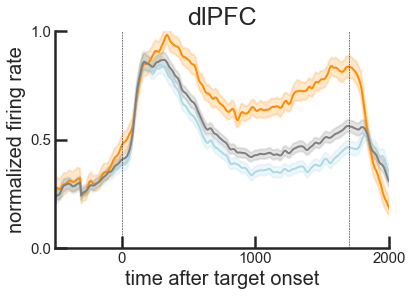

In [128]:
## controls

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest = df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_subset, color='darkorange', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_rest, color='lightblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_x, color='grey', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


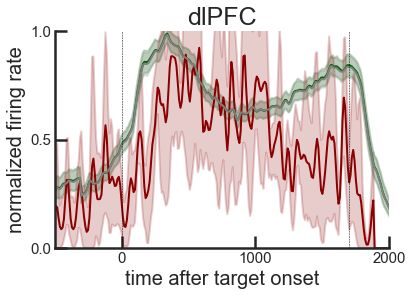

In [129]:
## controls: separate correct from wrong

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_correct = df_subset.loc[df_subset['performance']==1] ##correct
df_wrong = df_subset.loc[df_subset['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_subset, color='grey', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


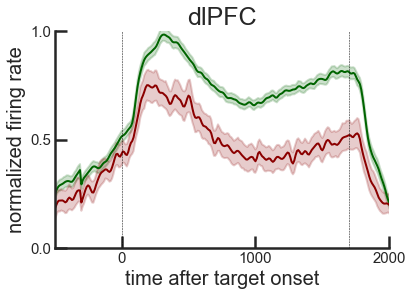

In [136]:
## T in RF distarctor near: separate correct from wrong

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_correct = df_subset.loc[df_subset['performance']==1] ##correct
df_wrong = df_subset.loc[df_subset['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong, color='darkred', linewidth=2)
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_subset, color='grey', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


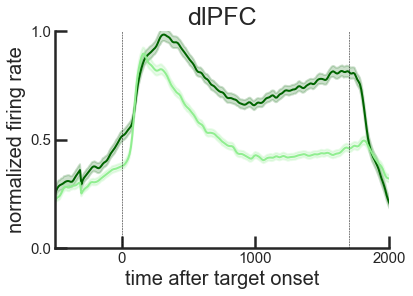

In [132]:
## T in RF distarctor near: separate correct in subset from correc in rest 

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest= df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_correct_subset = df_subset.loc[df_subset['performance']==1] ##correct
df_correct_rest= df_rest.loc[df_rest['performance']==1] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct_subset, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct_rest, color='lightgreen', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


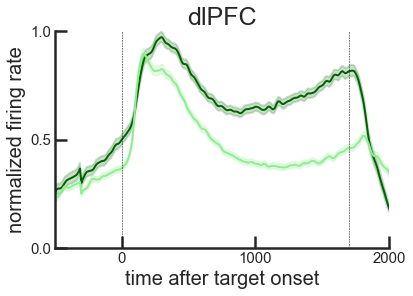

In [135]:
## T in RF distarctor far: separate correct in subset from correc in rest 

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest= df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_correct_subset = df_subset.loc[df_subset['performance']==1] ##correct
df_correct_rest= df_rest.loc[df_rest['performance']==1] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct_subset, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct_rest, color='lightgreen', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


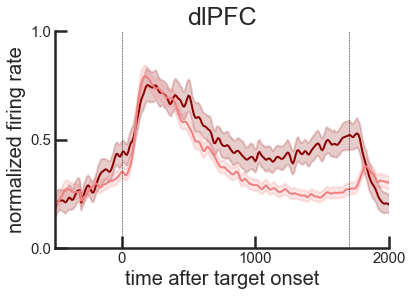

In [133]:
## T in RF distarctor near: separate wrong in subset from wrong in rest 

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest= df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_wrong_subset = df_subset.loc[df_subset['performance']==0] ##correct
df_wrong_rest= df_rest.loc[df_rest['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_subset, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_rest, color='lightcoral', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


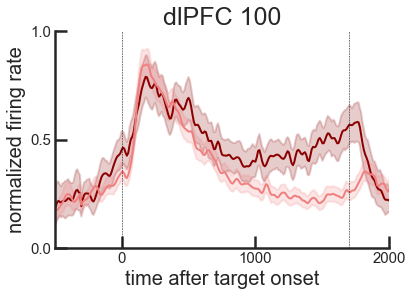

In [140]:
## T in RF distarctor near: separate wrong in subset from wrong in rest, distractor at 0 

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest= df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_wrong_subset = df_subset.loc[df_subset['performance']==0] ##correct
df_wrong_rest= df_rest.loc[df_rest['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_subset, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_rest, color='lightcoral', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC 100', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


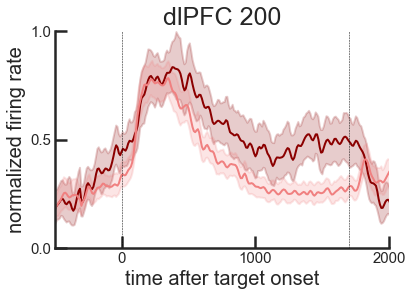

In [141]:
## T in RF distarctor near: separate wrong in subset from wrong in rest, distractor at 0 

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['TDOA']==100) &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest= df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_wrong_subset = df_subset.loc[df_subset['performance']==0] ##correct
df_wrong_rest= df_rest.loc[df_rest['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_subset, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_rest, color='lightcoral', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC 200', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


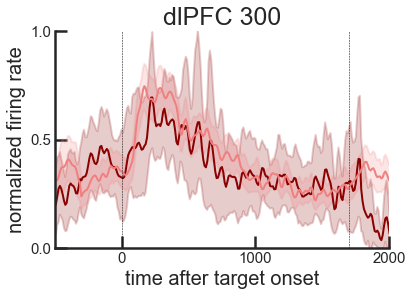

In [142]:
## T in RF distarctor near: separate wrong in subset from wrong in rest, distractor at 0 

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['TDOA']==200) &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest= df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_wrong_subset = df_subset.loc[df_subset['performance']==0] ##correct
df_wrong_rest= df_rest.loc[df_rest['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_subset, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_rest, color='lightcoral', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC 300', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


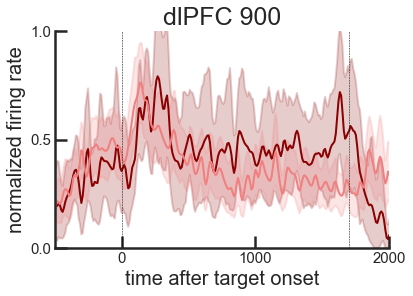

In [143]:
## T in RF distarctor near: separate wrong in subset from wrong in rest, distractor at 0 

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['TDOA']==800) &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest= df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_wrong_subset = df_subset.loc[df_subset['performance']==0] ##correct
df_wrong_rest= df_rest.loc[df_rest['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_subset, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_rest, color='lightcoral', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC 900', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


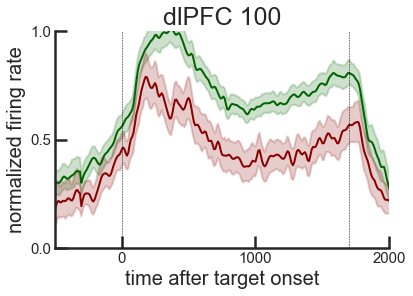

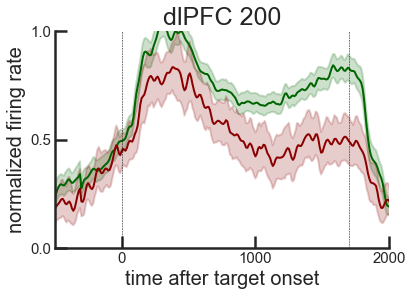

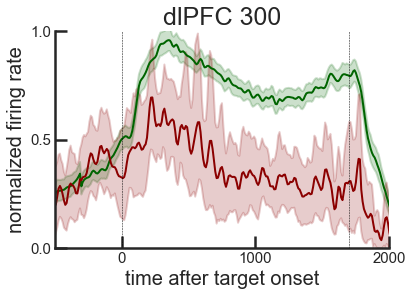

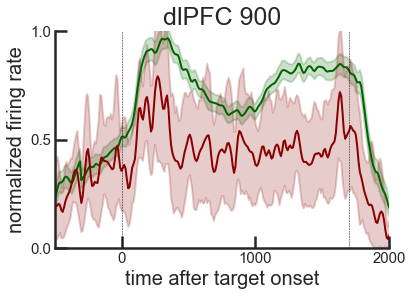

In [150]:
#Correct vs worn in each TDOA condition in subset

## T in RF distarctor close: separate correct from wrong in each TDOA

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]

for TDOA in [0, 100, 200, 800]:
    df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC')  & (df['TDOA']==TDOA) 
                         & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

    df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
    df_correct = df_subset.loc[df_subset['performance']==1] ##correct
    df_wrong = df_subset.loc[df_subset['performance']==0] ##wrong

    plt.figure()
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct, color='darkgreen', linewidth=2)
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong, color='darkred', linewidth=2)
    #sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_subset, color='grey', linewidth=2)

    plt.xlim(-500, 2000)
    plt.ylim(0,1)
    plt.yticks([0,0.5,1])
    #plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.title('dlPFC ' + str(TDOA+100), fontsize=25)
    plt.ylabel('normalized firing rate', fontsize=20)
    plt.xlabel('time after target onset', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
    plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)
    plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


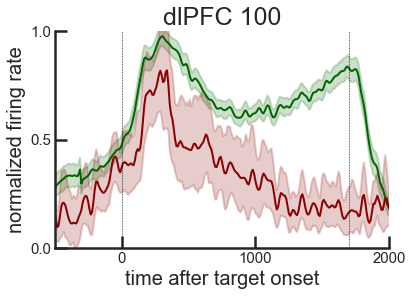

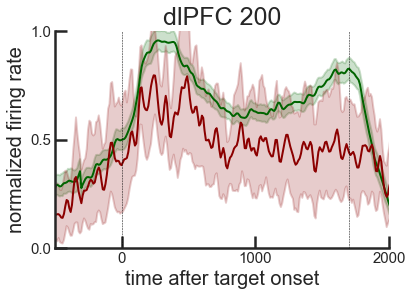

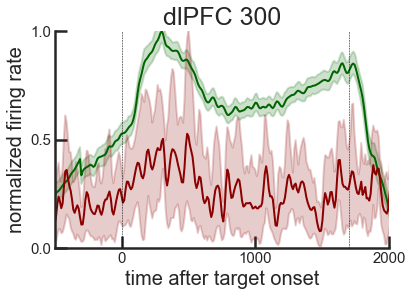

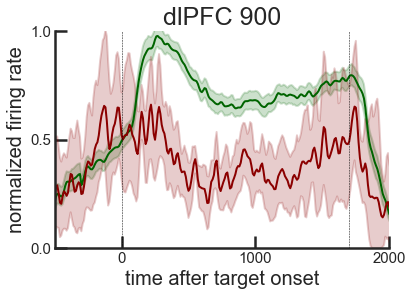

In [148]:
#Correct vs worn in each TDOA condition in subset

## T in RF distarctor far: separate correct from wrong in each TDOA

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]

for TDOA in [0, 100, 200, 800]:
    df_x = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC')  & (df['TDOA']==TDOA) 
                         & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

    df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
    df_correct = df_subset.loc[df_subset['performance']==1] ##correct
    df_wrong = df_subset.loc[df_subset['performance']==0] ##wrong

    plt.figure()
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct, color='darkgreen', linewidth=2)
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong, color='darkred', linewidth=2)
    #sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_subset, color='grey', linewidth=2)

    plt.xlim(-500, 2000)
    plt.ylim(0,1)
    plt.yticks([0,0.5,1])
    #plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.title('dlPFC ' + str(TDOA+100), fontsize=25)
    plt.ylabel('normalized firing rate', fontsize=20)
    plt.xlabel('time after target onset', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
    plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)
    plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


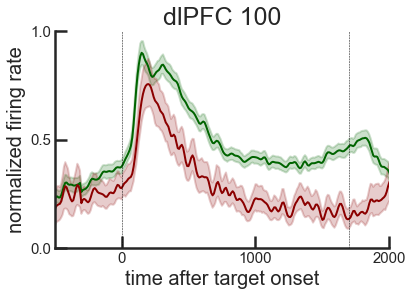

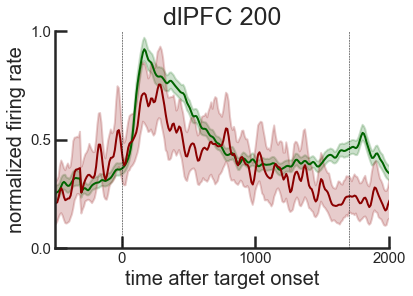

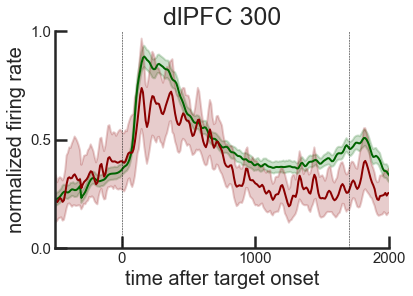

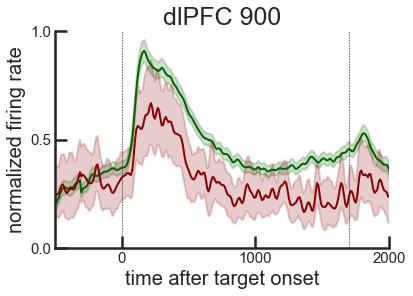

In [149]:
#Correct vs worn in each TDOA condition in rest

## T in RF distarctor far: separate correct from wrong in each TDOA

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]

for TDOA in [0, 100, 200, 800]:
    df_x = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC')  & (df['TDOA']==TDOA) 
                         & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

    df_rest = df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
    df_correct = df_rest.loc[df_rest['performance']==1] ##correct
    df_wrong = df_rest.loc[df_rest['performance']==0] ##wrong

    plt.figure()
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct, color='darkgreen', linewidth=2)
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong, color='darkred', linewidth=2)
    #sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_subset, color='grey', linewidth=2)

    plt.xlim(-500, 2000)
    plt.ylim(0,1)
    plt.yticks([0,0.5,1])
    #plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.title('dlPFC ' + str(TDOA+100), fontsize=25)
    plt.ylabel('normalized firing rate', fontsize=20)
    plt.xlabel('time after target onset', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
    plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)
    plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


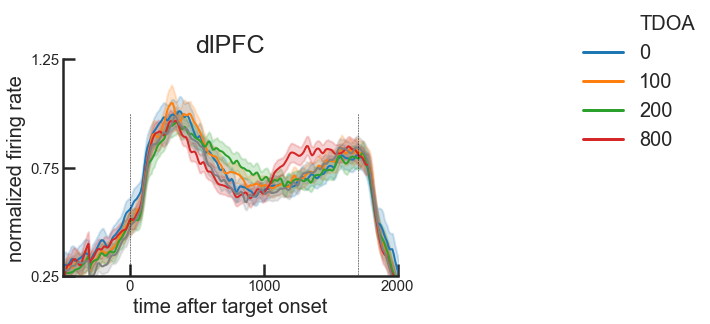

In [157]:
## Quin FR es troba el distractor quan entra?

## T in RF distarctor near: separate subset correct at different TDOAs

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


Pal = sns.color_palette("tab10")[:4]

df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]


df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_correct_subset = df_subset.loc[df_subset['performance']==1] ##correct


sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', data=df_correct_subset, palette=Pal, linewidth=2)

df_cont = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) 
                & (df['neuron'].isin(perf_100_best) ) &  (df['performance']==1) ]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_cont, color='grey', linewidth=2)


plt.xlim(-500, 2000)
plt.ylim(0.25,1.25)
plt.yticks([0.25,0.75,1.25])
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


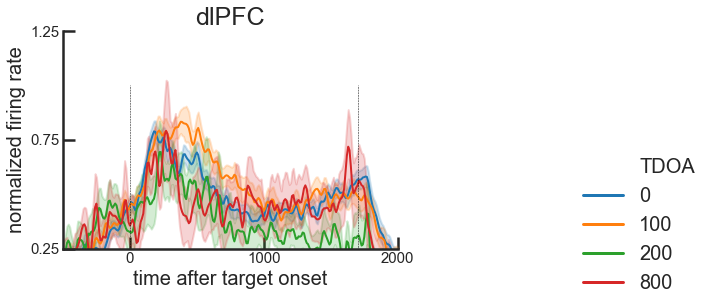

In [51]:
perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


Pal = sns.color_palette("tab10")[:4]

df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]


df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_correct_subset = df_subset.loc[df_subset['performance']==0] ##correct


sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', ci=69, data=df_correct_subset, palette=Pal, linewidth=2)




plt.xlim(-500, 2000)
plt.ylim(0.25,1.25)
plt.yticks([0.25,0.75,1.25])
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


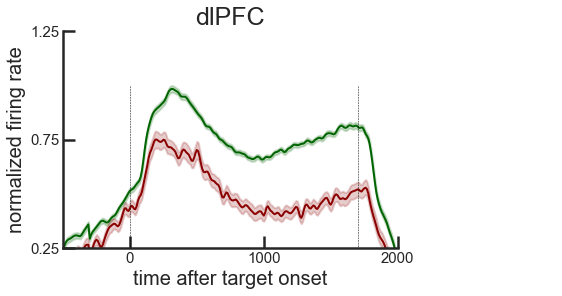

In [50]:
perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


Pal = sns.color_palette("tab10")[:4]

df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]


df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_correct_subset = df_subset.loc[df_subset['performance']==1] ##correct


sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=69, data=df_correct_subset, color='darkgreen', linewidth=2)


df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]


df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_correct_subset = df_subset.loc[df_subset['performance']==0] ##correct


sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=69, data=df_correct_subset, color='darkred', linewidth=2)


plt.xlim(-500, 2000)
plt.ylim(0.25,1.25)
plt.yticks([0.25,0.75,1.25])
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


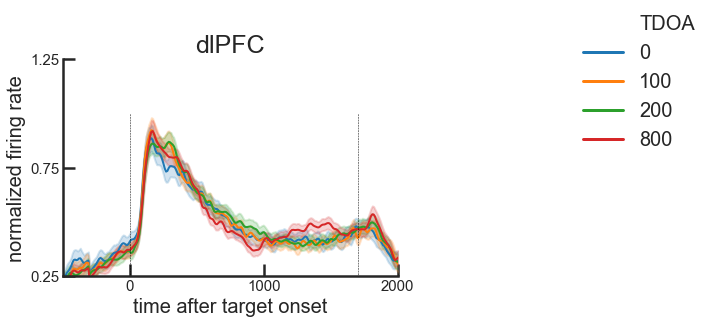

In [153]:
## Quin FR es troba el distractor quan entra?

## T in RF distarctor near: separate subset correct at different TDOAs

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


Pal = sns.color_palette("tab10")[:4]


df_x = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_rest = df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_correct_rest = df_rest.loc[df_rest['performance']==1] ##correct


sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', data=df_correct_rest, palette=Pal, linewidth=2)



plt.xlim(-500, 2000)
plt.ylim(0.25,1.25)
plt.yticks([0.25,0.75,1.25])
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


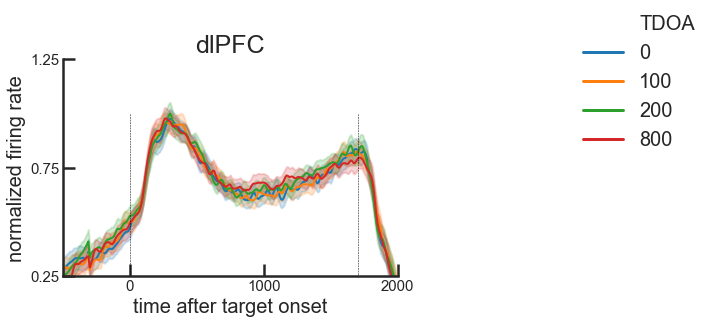

In [154]:
## Quin FR es troba el distractor quan entra?

## T in RF distarctor far: separate subset correct at different TDOAs

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


Pal = sns.color_palette("tab10")[:4]


df_x = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_correct_subset = df_subset.loc[df_subset['performance']==1] ##correct


sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', data=df_correct_subset, palette=Pal, linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0.25,1.25)
plt.yticks([0.25,0.75,1.25])
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


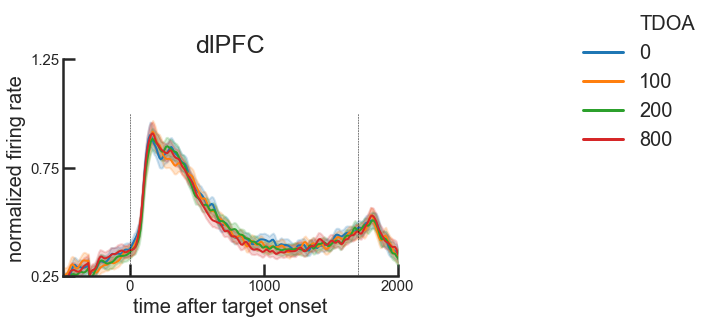

In [155]:
## Quin FR es troba el distractor quan entra?

## T in RF distarctor far: separate rest correct at different TDOAs

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


Pal = sns.color_palette("tab10")[:4]


df_x = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_rest = df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_correct_rest = df_rest.loc[df_rest['performance']==1] ##correct


sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', data=df_correct_rest, palette=Pal, linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0.25,1.25)
plt.yticks([0.25,0.75,1.25])
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


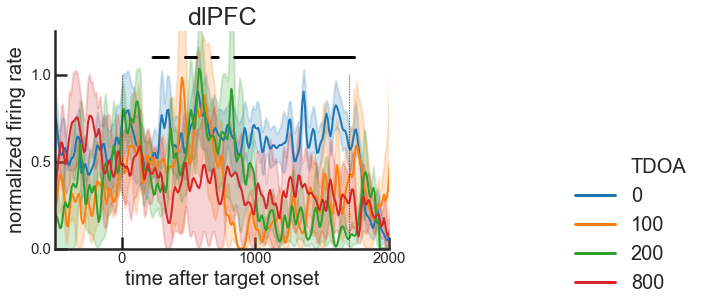

In [242]:
## Impacte distractor?

## D in RF target far: separate subset correct at different TDOAs

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


Pal = sns.color_palette("tab10")[:4]


df_x = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_wrong_subset = df_subset.loc[df_subset['performance']==0] ##correct


sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA',ci=68, data=df_wrong_subset, palette=Pal, linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0.,1.25)
#plt.yticks([0.25,0.75,1.25])
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)


wd_size=100
sign_times= np.arange(-500, 2100, 1)
sign_=[]
for t in sign_times:
    test_ = df_wrong_subset.loc[(df_wrong_subset['time_centered']>t) & (df_wrong_subset['time_centered']<t+wd_size)]
    tukey = pairwise_tukeyhsd(endog=test_['norm_firing_gauss'].values, groups=test_['TDOA'].values,  alpha=0.01)
    if tukey.reject[2]==True:
        if tukey.meandiffs[2]<0:
            sign_.append(True)
        else:
            sign_.append(False)
            
    else:
        sign_.append(False)
    
plt.plot(sign_times[sign_], [1.1 for x in range(len(sign_times[sign_]))], 'ko', markersize=1)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


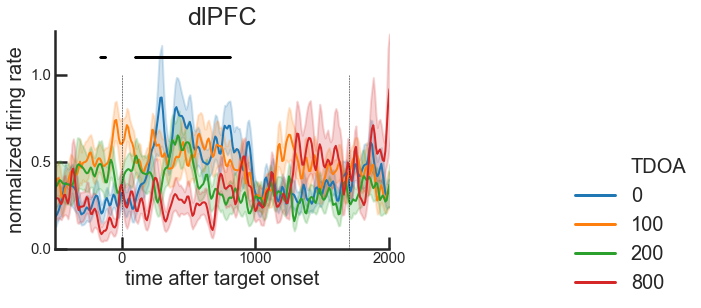

In [243]:
## Impacte distractor?

## D in RF target close: separate subset correct at different TDOAs

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


Pal = sns.color_palette("tab10")[:4]


df_x = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') &
                     (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_rest = df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_wrong_rest = df_rest.loc[df_rest['performance']==0] ##correct


sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', ci=68, data=df_wrong_rest, palette=Pal, linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0.,1.25)
#plt.yticks([0.25,0.75,1.25])
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

wd_size=100
sign_times= np.arange(-500, 2100, 1)
sign_=[]
for t in sign_times:
    test_ = df_wrong_rest.loc[(df_wrong_rest['time_centered']>t) & (df_wrong_rest['time_centered']<t+wd_size)]
    tukey = pairwise_tukeyhsd(endog=test_['norm_firing_gauss'].values, groups=test_['TDOA'].values,  alpha=0.01)
    if tukey.reject[2]==True:
        if tukey.meandiffs[2]<0: 
            sign_.append(True)
        else:
            sign_.append(False)
            
    else:
        sign_.append(False)
    
plt.plot(sign_times[sign_], [1.1 for x in range(len(sign_times[sign_]))], 'ko', markersize=1)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


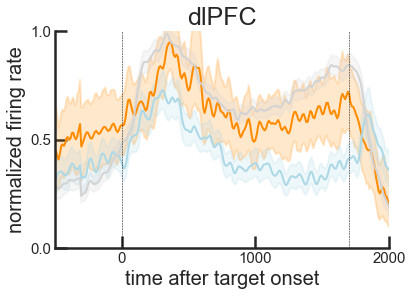

In [249]:
## Distractor in RF in errors for subpop and rest compare with correct in RF subpopulation

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0) 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest = df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=69, data=df_subset, color='darkorange', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=69, data=df_rest, color='lightblue', linewidth=2)


df_contr = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') & (df['performance']==1) & df['neuron'].isin(perf_100_best)  
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=69, data=df_contr, color='lightgrey', linewidth=2)


plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

In [17]:
df.loc[(df['TDconf']==0)].performance.unique()

array([1, 0], dtype=int64)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


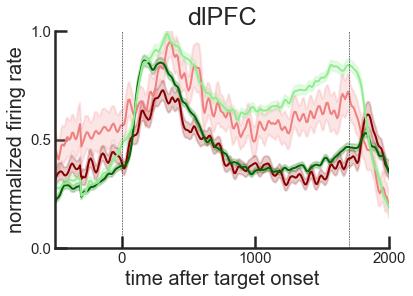

In [16]:
## Distractor in RF in errors for subpop and rest compare with correct in RF subpopulation

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0) 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest = df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=69, data=df_subset, color='lightcoral', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=69, data=df_rest, color='darkred', linewidth=2)


df_contr = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (~df['neuron'].isin(perf_100_best))  
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=69, data=df_contr, color='darkgreen', linewidth=2)


df_contr2 = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') & (df['performance']==1) & df['neuron'].isin(perf_100_best)  
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=69, data=df_contr2, color='lightgreen', linewidth=2)



plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


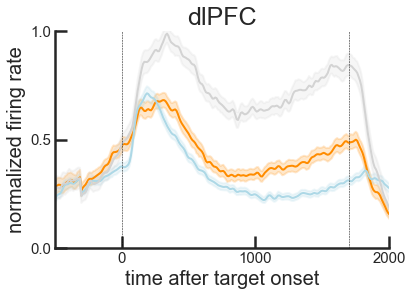

In [250]:
## Distractor in RF in correct compare with correct subpopulation

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0) 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest = df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=95, data=df_subset, color='darkorange', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=95, data=df_rest, color='lightblue', linewidth=2)


df_contr = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') & (df['performance']==1) & df['neuron'].isin(perf_100_best)  
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=95, data=df_contr, color='lightgrey', linewidth=2)


plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

In [5]:

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


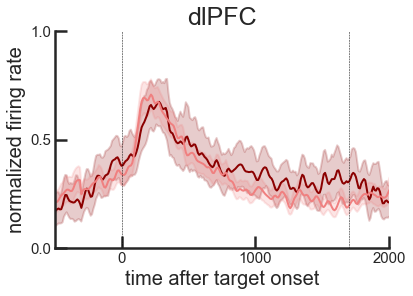

In [134]:
## T in RF distarctor far: separate wrong in subset from wrong in rest 

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest= df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_wrong_subset = df_subset.loc[df_subset['performance']==0] ##correct
df_wrong_rest= df_rest.loc[df_rest['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_subset, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_rest, color='lightcoral', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


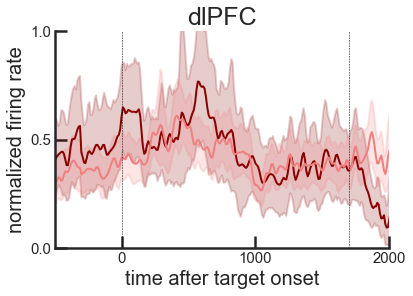

In [138]:
## D in RF target far: separate wrong in subset from wrong in rest 

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest= df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_wrong_subset = df_subset.loc[df_subset['performance']==0] ##correct
df_wrong_rest= df_rest.loc[df_rest['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_subset, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_rest, color='lightcoral', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


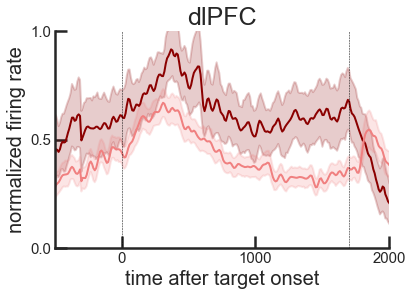

In [137]:
## D in RF target close: separate wrong in subset from wrong in rest 

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_rest= df_x.loc[~df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD

df_wrong_subset = df_subset.loc[df_subset['performance']==0] ##correct
df_wrong_rest= df_rest.loc[df_rest['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_subset, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong_rest, color='lightcoral', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


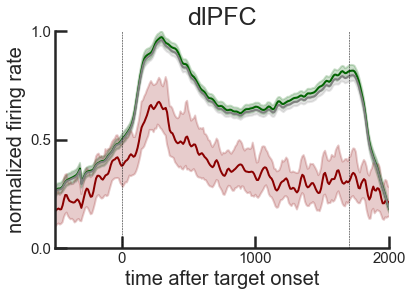

In [131]:
## T in RF distarctor far: separate correct from wrong

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_x = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') 
                     & (df['monkey']=='Speriatus') & (df['perfromance_code'].isin([1,15,8])) ]

df_subset = df_x.loc[df_x['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_correct = df_subset.loc[df_subset['performance']==1] ##correct
df_wrong = df_subset.loc[df_subset['performance']==0] ##wrong

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_wrong, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_subset, color='grey', linewidth=2)

plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


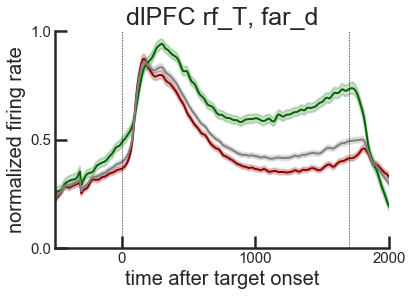

In [126]:
## T in RF distractor far

##best performance 100

perf_100_best = [  1370202, 189168701, 189169502, 189171003, 189171602, 189173101,
       189175801, 189176501, 189177402,   1891783,   1891793,   1891819,
       189182202, 189182901]


df_pfc_cont = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & (df['monkey']=='Speriatus') ]

df_pfc_cont_less = df_pfc_cont.loc[df_pfc_cont['neuron'].isin(perf_100_best)] ##better decoding in CTD
df_pfc_cont_more = df_pfc_cont.loc[~df_pfc_cont['neuron'].isin(perf_100_best)] ##worse decoding in CTD

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_cont_less, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_cont_more, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_cont, color='grey', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC rf_T, far_d', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


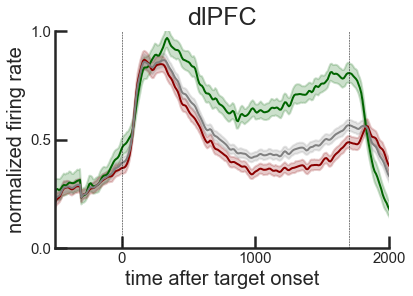

In [333]:
df_100_pfc = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) & (df['perfromance']==1)]

df_pfc_100_less = df_100_pfc.loc[df_100_pfc['neuron'].isin(perf_100_best)]
df_pfc_100_more = df_100_pfc.loc[~df_100_pfc['neuron'].isin(perf_100_best)]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_cont_less, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_cont_more, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_cont, color='grey', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


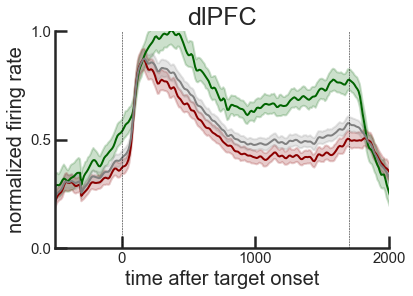

In [351]:
df_100_pfc = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) & (df['performance']==1)]

df_pfc_100_less = df_100_pfc.loc[df_100_pfc['neuron'].isin(perf_100_best)]
df_pfc_100_more = df_100_pfc.loc[~df_100_pfc['neuron'].isin(perf_100_best)]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_less, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_more, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc, color='grey', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


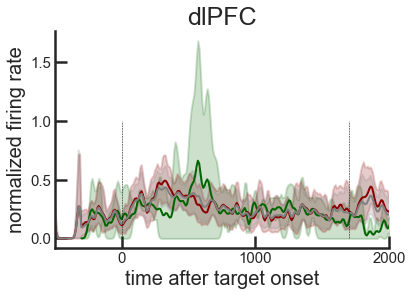

In [352]:
df_100_pfc = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) & (df['performance']==0)]

df_pfc_100_less = df_100_pfc.loc[df_100_pfc['neuron'].isin(perf_100_best)]
df_pfc_100_more = df_100_pfc.loc[~df_100_pfc['neuron'].isin(perf_100_best)]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_less, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_more, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc, color='grey', linewidth=2)
plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

In [348]:
errors = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) & (df['performance']==0)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


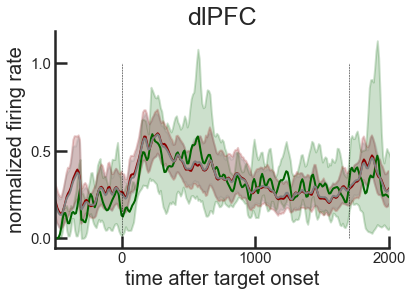

In [353]:
df_100_pfc = df.loc[(df['TDconf'].isin([0,1,2])) & (df['brain_region']=='DLPFC') & (df['performance']==0)]

df_pfc_100_less = df_100_pfc.loc[df_100_pfc['neuron'].isin(perf_100_best)]
df_pfc_100_more = df_100_pfc.loc[~df_100_pfc['neuron'].isin(perf_100_best)]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_less, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_more, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_100_pfc, color='grey', linewidth=2)
plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

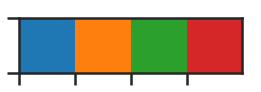

In [85]:
sns.palplot(sns.color_palette("tab10")[:4])
Pal = sns.color_palette("tab10")[:4]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'dlPFC TRF-Dclose')

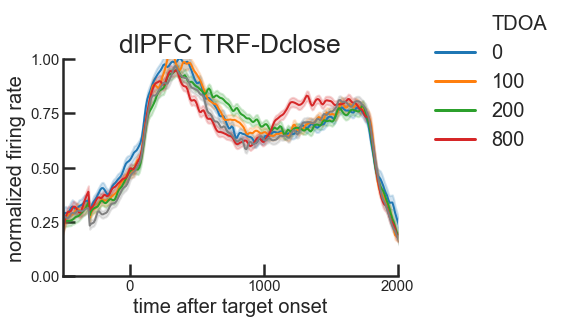

In [394]:
df_dist_pfc = df.loc[(df['TDconf'].isin([1])) & (df['brain_region']=='DLPFC') & (df['performance']==1)]
df_cont_pfc = df.loc[(df['TDconf'].isin([0])) & (df['brain_region']=='DLPFC') & (df['performance']==1)]

df_dist_pfc_less = df_dist_pfc.loc[df_dist_pfc['neuron'].isin(perf_100_best)]
df_cont_pfc_less = df_cont_pfc.loc[df_cont_pfc['neuron'].isin(perf_100_best)]


sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', ci=68, data=df_dist_pfc_less, palette=Pal, linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=68, data=df_cont_pfc_less, color='grey', linewidth=2)


plt.xlim(-500, 2000)
#plt.ylim(0.3, 0.6)
plt.ylim(0., 1.)

#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('dlPFC TRF-Dclose')

#plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
#plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'dlPFC TRF-Dfar')

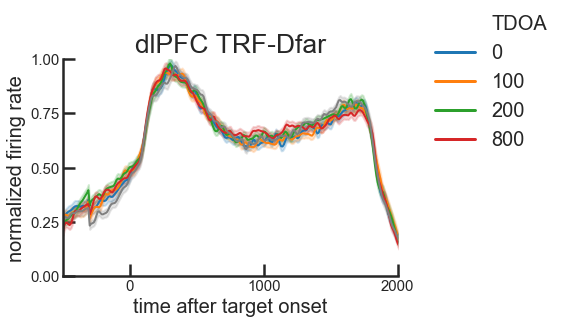

In [395]:
df_dist_pfc = df.loc[(df['TDconf'].isin([2])) & (df['brain_region']=='DLPFC') & (df['performance']==1)]
df_cont_pfc = df.loc[(df['TDconf'].isin([0])) & (df['brain_region']=='DLPFC') & (df['performance']==1)]

df_dist_pfc_less = df_dist_pfc.loc[df_dist_pfc['neuron'].isin(perf_100_best)]
df_cont_pfc_less = df_cont_pfc.loc[df_cont_pfc['neuron'].isin(perf_100_best)]


sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', ci=68, data=df_dist_pfc_less, palette=Pal, linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=68, data=df_cont_pfc_less, color='grey', linewidth=2)

plt.xlim(-500, 2000)
#plt.ylim(0.3, 0.6)
plt.ylim(0., 1)

#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('dlPFC TRF-Dfar')

#plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
#plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

In [58]:
df.loc[ df['monkey']==monkey].neuron.unique()

array([1364705, 1365201, 1365301, 1365501, 1365701, 1365802, 1365902,
       1366002, 1366101, 1367701, 1367802, 1367903, 1369702, 1369901,
       1370002, 1370202, 1371202, 1371901, 1372003, 1372301, 1372402],
      dtype=int64)

In [67]:
number_trials

1

## Behaviour

In [101]:
df.perfromance_code.unique()

array([ 1, 15,  8,  3, 11, 13,  2], dtype=int64)

In [112]:
print(100*(len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==15)   ]) / len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==1)   ]) ) )
print( 100*(len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==15)   ]) / len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==1)   ]) ) )

9.253571745913042
21.346987379248


In [113]:
print(100*(len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==8)   ]) / len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==1)   ]) ) )
print( 100*(len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==8)   ]) / len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==1)   ]) ) )

0.15783494906162457
5.710792413528775


In [114]:
print(100*(len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==3)   ]) / len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==1)   ]) ) )
print( 100*(len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==3)   ]) / len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==1)   ]) ) )

0.0
0.0


In [115]:
print(100*(len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==11)   ]) / len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==1)   ]) ) )
print( 100*(len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==11)   ]) / len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==1)   ]) ) )

0.3272391505778984
2.296188465526675


In [116]:
print(100*(len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==13)   ]) / len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==1)   ]) ) )
print( 100*(len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==13)   ]) / len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==1)   ]) ) )

0.0
0.0


In [117]:
print(100*(len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==2)   ]) / len(df1.loc[(df1['monkey']=='Speriatus')  &  (df1['perfromance_code']==1)   ]) ) )
print( 100*(len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==2)   ]) / len(df1.loc[(df1['monkey']=='Mojo')  &  (df1['perfromance_code']==1)   ]) ) )

0.0
0.0


In [121]:
df1=df.loc[df['perfromance_code'].isin([1,15])]

performance=[]
for performance_ in ['correct', 'wrong']:
    if performance_=='correct':
        perf_=1
    else:
        perf_=0
    #
    for monkey in ['Speriatus', 'Mojo']:
        for TDOA in [0,100,200,800]:
            for dist in ['near', 'far']:
                if dist=='near':
                    configs = [1,3] ##,5,7]
                elif dist=='far':
                    configs=[2,4] ##,6]
                    #
                ##
                number=[] ##for each neuron in the monkey the ones that fullfill the condition
                for neuron in df1.loc[ df1['monkey']==monkey].neuron.unique():
                    number_trials = len( df1.loc[ (df1['performance']==perf_) & (df1['monkey']==monkey) &
                                         (df1['neuron']==neuron) &
                                         (df1['TDOA']==TDOA)  & (df1['TDconf'].isin(configs))].trial.unique())
                    #
                    number.append(number_trials)
                
                ###
                performance.append([sum(number), performance_, monkey, TDOA, dist])

#        
df_performance=pd.DataFrame(performance)
df_performance.columns=['n_trials', 'performance', 'monkey', 'TDOA', 'distance']
df_performance.head()

n_trials performance     monkey  TDOA distance
0      4372     correct  Speriatus     0     near
1      3145     correct  Speriatus     0      far
2      2939     correct  Speriatus   100     near
3      3300     correct  Speriatus   100      far
4      3219     correct  Speriatus   200     near

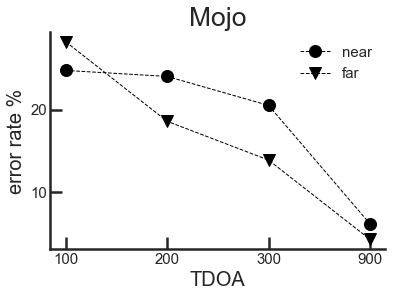

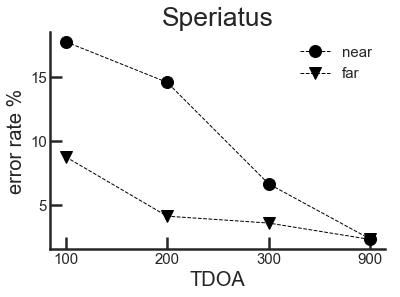

In [122]:
#### [ 1, 15]


for Monkey in ['Mojo', 'Speriatus']:
    ##
    c_n = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='near') & 
                       (df_performance['performance']=='correct') ].n_trials.values

    w_n = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='near') & 
                       (df_performance['performance']=='wrong') ].n_trials.values

    percentages_n = list(w_n/(w_n+c_n)*100)


    c_f = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='far') & 
                       (df_performance['performance']=='correct') ].n_trials.values

    w_f = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='far') & 
                       (df_performance['performance']=='wrong') ].n_trials.values

    percentages_f = list(w_f/(w_f+c_f)*100)


    ###
    plt.figure()
    plt.plot([0,1,2,3], percentages_n, linestyle='--', color='k', marker='o', linewidth=1, label='near' )
    plt.plot([0,1,2,3], percentages_f, linestyle='--', color='k', marker='v', linewidth=1, label='far' )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.ylabel('error rate %', fontsize=20)
    plt.xlabel('TDOA', fontsize=20)
    plt.xticks([0,1,2,3], [100,200,300,900])
    plt.yticks([0,10,20,30])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(Monkey)
    plt.legend( loc=1, frameon=False, prop={'size': 15})
    plt.show()

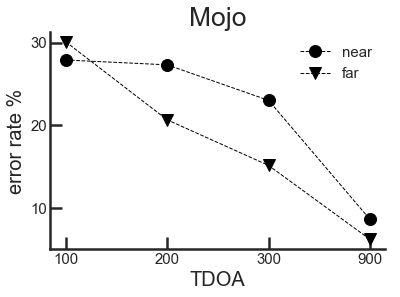

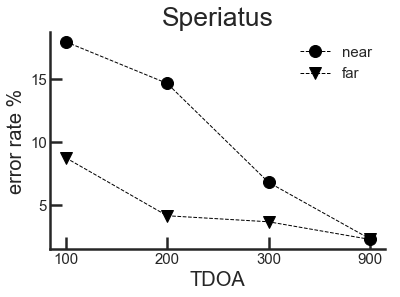

In [120]:
#### [ 1, 15,  8]


for Monkey in ['Mojo', 'Speriatus']:
    ##
    c_n = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='near') & 
                       (df_performance['performance']=='correct') ].n_trials.values

    w_n = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='near') & 
                       (df_performance['performance']=='wrong') ].n_trials.values

    percentages_n = list(w_n/(w_n+c_n)*100)


    c_f = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='far') & 
                       (df_performance['performance']=='correct') ].n_trials.values

    w_f = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='far') & 
                       (df_performance['performance']=='wrong') ].n_trials.values

    percentages_f = list(w_f/(w_f+c_f)*100)


    ###
    plt.figure()
    plt.plot([0,1,2,3], percentages_n, linestyle='--', color='k', marker='o', linewidth=1, label='near' )
    plt.plot([0,1,2,3], percentages_f, linestyle='--', color='k', marker='v', linewidth=1, label='far' )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.ylabel('error rate %', fontsize=20)
    plt.xlabel('TDOA', fontsize=20)
    plt.xticks([0,1,2,3], [100,200,300,900])
    plt.yticks([0,10,20,30])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(Monkey)
    plt.legend( loc=1, frameon=False, prop={'size': 15})
    plt.show()

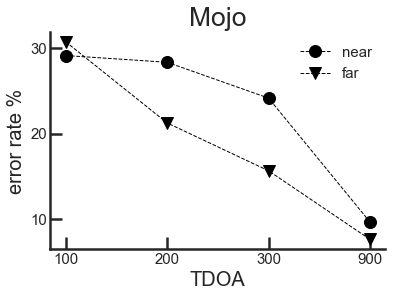

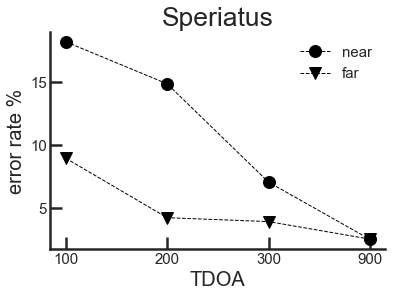

In [105]:
#### [ 1, 15,  8,  11]


for Monkey in ['Mojo', 'Speriatus']:
    ##
    c_n = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='near') & 
                       (df_performance['performance']=='correct') ].n_trials.values

    w_n = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='near') & 
                       (df_performance['performance']=='wrong') ].n_trials.values

    percentages_n = list(w_n/(w_n+c_n)*100)


    c_f = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='far') & 
                       (df_performance['performance']=='correct') ].n_trials.values

    w_f = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='far') & 
                       (df_performance['performance']=='wrong') ].n_trials.values

    percentages_f = list(w_f/(w_f+c_f)*100)


    ###
    plt.figure()
    plt.plot([0,1,2,3], percentages_n, linestyle='--', color='k', marker='o', linewidth=1, label='near' )
    plt.plot([0,1,2,3], percentages_f, linestyle='--', color='k', marker='v', linewidth=1, label='far' )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.ylabel('error rate %', fontsize=20)
    plt.xlabel('TDOA', fontsize=20)
    plt.xticks([0,1,2,3], [100,200,300,900])
    plt.yticks([0,10,20,30])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(Monkey)
    plt.legend( loc=1, frameon=False, prop={'size': 15})
    plt.show()

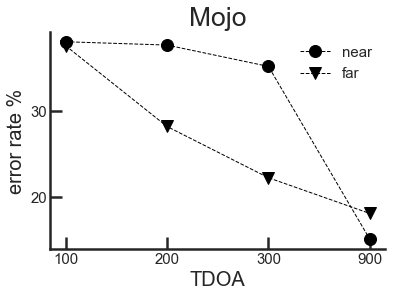

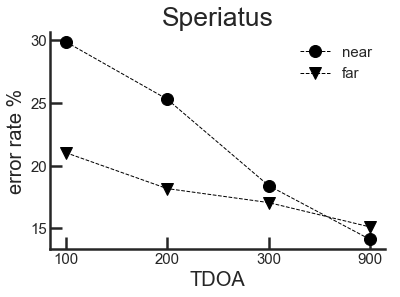

In [90]:
#### [ 1, 15,  8,  3, 11, 13,  2]

for Monkey in ['Mojo', 'Speriatus']:
    ##
    c_n = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='near') & 
                       (df_performance['performance']=='correct') ].n_trials.values

    w_n = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='near') & 
                       (df_performance['performance']=='wrong') ].n_trials.values

    percentages_n = list(w_n/(w_n+c_n)*100)


    c_f = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='far') & 
                       (df_performance['performance']=='correct') ].n_trials.values

    w_f = df_performance.loc[(df_performance['monkey']==Monkey) & 
                       (df_performance['distance']=='far') & 
                       (df_performance['performance']=='wrong') ].n_trials.values

    percentages_f = list(w_f/(w_f+c_f)*100)


    ###
    plt.figure()
    plt.plot([0,1,2,3], percentages_n, linestyle='--', color='k', marker='o', linewidth=1, label='near' )
    plt.plot([0,1,2,3], percentages_f, linestyle='--', color='k', marker='v', linewidth=1, label='far' )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.ylabel('error rate %', fontsize=20)
    plt.xlabel('TDOA', fontsize=20)
    plt.xticks([0,1,2,3], [100,200,300,900])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.yticks([0,10,20,30])
    plt.title(Monkey)
    plt.legend( loc=1, frameon=False, prop={'size': 15})
    plt.show()

In [75]:
df.head()

Unnamed: 0  firing_gauss  times  trial  TDOA  TDconf  targetloc  distLoc  \
0           0      0.025193      0      0   800       1          0        1   
1           1      0.025486     10      0   800       1          0        1   
2           2      0.018175     20      0   800       1          0        1   
3           3      0.015012     30      0   800       1          0        1   
4           4      0.024514     40      0   800       1          0        1   

   fixationtime  perfromance_code  saccadeChoice  cueDuration  distDur monkey  \
0           500                 1              0          100      100   Mojo   
1           500                 1              0          100      100   Mojo   
2           500                 1              0          100      100   Mojo   
3           500                 1              0          100      100   Mojo   
4           500                 1              0          100      100   Mojo   

    neuron brain_region  rf_loc  performance  norm_firing_gauss  time_centered  
0  1364705          LIP     135            1           0.846866           -500  
1  1364705          LIP     135            1           0.856722           -490  
2  1364705          LIP     135            1           0.610950           -480  
3  1364705          LIP     135            1           0.504622           -470  
4  1364705          LIP     135            1           0.824021           -460

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


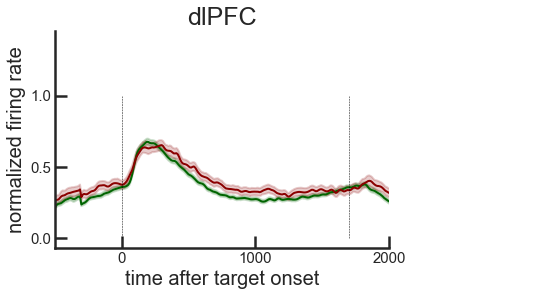

In [74]:
df_corr = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0)]
df_err = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0)]


sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_corr, color='darkgreen',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_err, color='darkred', linewidth=2)

plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

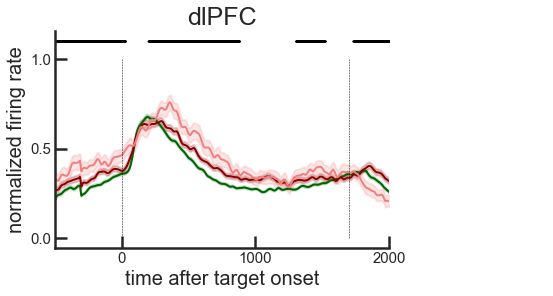

In [13]:
df_best = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0)  & (df['neuron'].isin(perf_100_best))] 
df_corr = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0)]
df_err = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0)]


sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_corr, ci=69, color='darkgreen',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_err, ci=69, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_best, ci=69, color='lightcoral', linewidth=2)


plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)


df_best['cond']=1
df_err['cond']=0
A=pd.concat([df_best, df_err])
wd_size=100
sign_times= np.arange(-500, 2100, 1)
sign_=[]
for t in sign_times:
    test_ = A.loc[(A['time_centered']>t) & (A['time_centered']<t+wd_size)]
    tukey = pairwise_tukeyhsd(endog=test_['norm_firing_gauss'].values, groups=test_['cond'].values,  alpha=0.01)
    if tukey.reject[0]==True:
        sign_.append(True)
            
    else:
        sign_.append(False)
    
plt.plot(sign_times[sign_], [1.1 for x in range(len(sign_times[sign_]))], 'ko', markersize=1)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

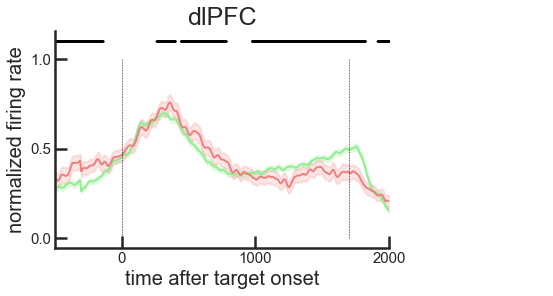

In [15]:
df_incorr = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0)  & (df['neuron'].isin(perf_100_best))] 
df_corr = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0)  & (df['neuron'].isin(perf_100_best))]



sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_corr, ci=69, color='lightgreen',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_incorr, ci=69, color='lightcoral', linewidth=2)


plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)


df_incorr['cond']=1
df_corr['cond']=0
A=pd.concat([df_incorr, df_corr])

wd_size=100
sign_times= np.arange(-500, 2100, 1)
sign_=[]
for t in sign_times:
    test_ = A.loc[(A['time_centered']>t) & (A['time_centered']<t+wd_size)]
    tukey = pairwise_tukeyhsd(endog=test_['norm_firing_gauss'].values, groups=test_['cond'].values,  alpha=0.01)
    if tukey.reject[0]==True:
        sign_.append(True)
            
    else:
        sign_.append(False)
    
plt.plot(sign_times[sign_], [1.1 for x in range(len(sign_times[sign_]))], 'ko', markersize=1)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


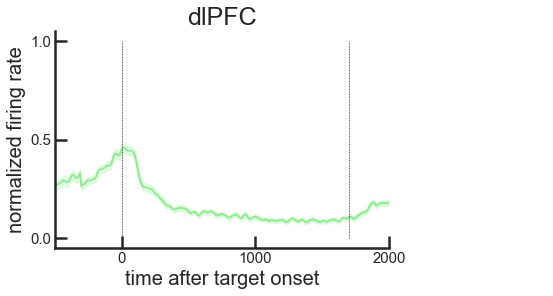

In [45]:
df_errors = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0) 
                     & (df['neuron'].isin(perf_100_best))] 



sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_errors, ci=69, color='lightgreen',  linewidth=2)


plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)




C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

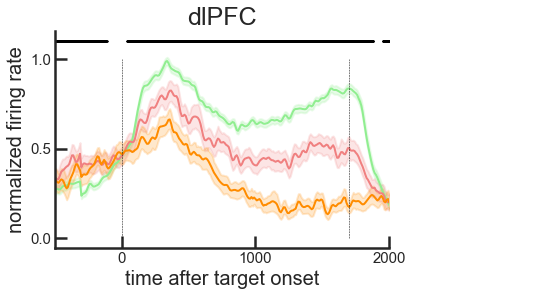

In [41]:
df_errors = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0) 
                    & (df['saccadeChoice']==0) & (df['neuron'].isin(perf_100_best))] 

df_errors2 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0)
                    & (df['saccadeChoice']!=0) & (df['neuron'].isin(perf_100_best))] 

df_correct = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') & (df['performance']==1) 
                    & (df['neuron'].isin(perf_100_best))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct, ci=69, color='lightgreen',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_errors, ci=69, color='lightcoral',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_errors2, ci=69, color='darkorange', linewidth=2)


plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)


df_errors['cond']=1
df_correct['cond']=0
A=pd.concat([df_errors, df_correct])
wd_size=100
sign_times= np.arange(-500, 2100, 1)
sign_=[]
for t in sign_times:
    test_ = A.loc[(A['time_centered']>t) & (A['time_centered']<t+wd_size)]
    tukey = pairwise_tukeyhsd(endog=test_['norm_firing_gauss'].values, groups=test_['cond'].values,  alpha=0.01)
    if tukey.reject[0]==True:
        sign_.append(True)
            
    else:
        sign_.append(False)
    
plt.plot(sign_times[sign_], [1.1 for x in range(len(sign_times[sign_]))], 'ko', markersize=1)

In [38]:
print(len(df_errors.trial.unique()))
print(len(df_errors2.trial.unique()))
print( len(df_correct.trial.unique()))

69
44
235


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


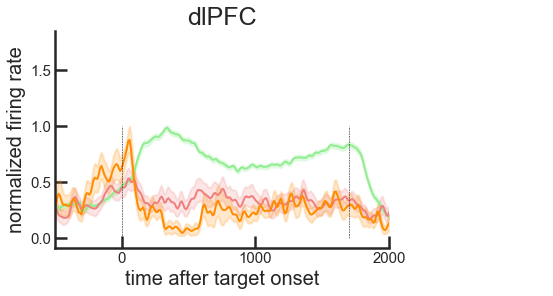

In [30]:
df_errors = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0) 
                    & (df['saccadeChoice']==0) & (df['neuron'].isin(perf_100_best))] 

df_errors2 = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0)
                    & (df['saccadeChoice']!=0) & (df['neuron'].isin(perf_100_best))] 

df_correct = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') & (df['performance']==1) 
                    & (df['neuron'].isin(perf_100_best))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct, ci=69, color='lightgreen',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_errors, ci=69, color='lightcoral',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_errors2, ci=69, color='darkorange', linewidth=2)


plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)


# df_best['cond']=1
# df_err['cond']=0
# A=pd.concat([df_best, df_err])
# wd_size=100
# sign_times= np.arange(-500, 2100, 1)
# sign_=[]
# for t in sign_times:
#     test_ = A.loc[(A['time_centered']>t) & (A['time_centered']<t+wd_size)]
#     tukey = pairwise_tukeyhsd(endog=test_['norm_firing_gauss'].values, groups=test_['cond'].values,  alpha=0.01)
#     if tukey.reject[0]==True:
#         sign_.append(True)
            
#     else:
#         sign_.append(False)
    
# plt.plot(sign_times[sign_], [1.1 for x in range(len(sign_times[sign_]))], 'ko', markersize=1)

In [35]:
print(len(df_errors.trial.unique()))
len(df_errors2.trial.unique())
len(df_correct.trial.unique())

27


235

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


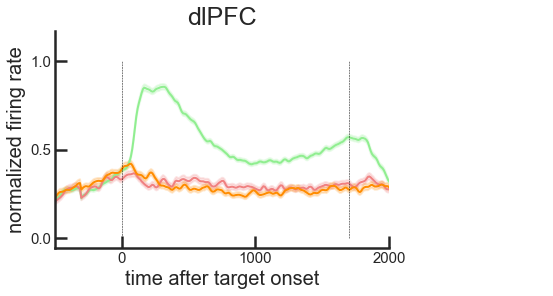

In [27]:
df_errors = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['performance']==0) 
                    & (df['saccadeChoice']==0) ] 

df_errors2 = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['performance']==0) 
                    & (df['saccadeChoice']!=0) ] 

df_correct = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') & (df['performance']==1) 
                    ] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_correct, ci=69, color='lightgreen',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_errors, ci=69, color='lightcoral',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_errors2, ci=69, color='darkorange', linewidth=2)


plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)


# df_best['cond']=1
# df_err['cond']=0
# A=pd.concat([df_best, df_err])
# wd_size=100
# sign_times= np.arange(-500, 2100, 1)
# sign_=[]
# for t in sign_times:
#     test_ = A.loc[(A['time_centered']>t) & (A['time_centered']<t+wd_size)]
#     tukey = pairwise_tukeyhsd(endog=test_['norm_firing_gauss'].values, groups=test_['cond'].values,  alpha=0.01)
#     if tukey.reject[0]==True:
#         sign_.append(True)
            
#     else:
#         sign_.append(False)
    
# plt.plot(sign_times[sign_], [1.1 for x in range(len(sign_times[sign_]))], 'ko', markersize=1)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


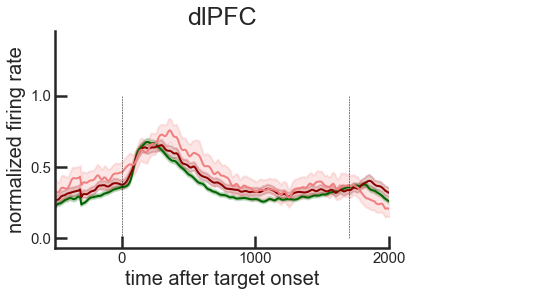

In [77]:
df_best = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0)  & (df['neuron'].isin(perf_100_best))] 
df_corr = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0)]
df_err = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0)]


sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_corr, color='darkgreen',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_err, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_best, color='lightcoral', linewidth=2)


plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


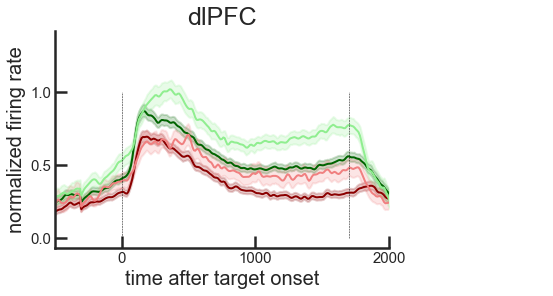

In [79]:
df_corr = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0)]
df_err = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0)]
df_best = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==0)  & (df['neuron'].isin(perf_100_best))] 
df_best_c = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0)  & (df['neuron'].isin(perf_100_best))] 


sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_corr, color='darkgreen',  linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_err, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_best, color='lightcoral', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_best_c, color='lightgreen', linewidth=2)



plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

In [84]:
df_best.TDOA.unique()

array([  0, 100, 200, 800], dtype=int64)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


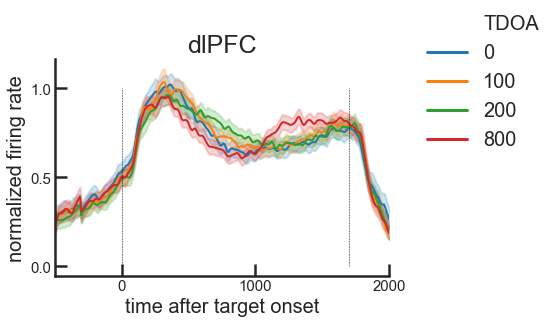

In [92]:
Pal = sns.color_palette("tab10")[:4]

df_best = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['neuron'].isin(perf_100_best))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', hue_order=[0,100,200,800], 
             data=df_best, palette=Pal, linewidth=2)



plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


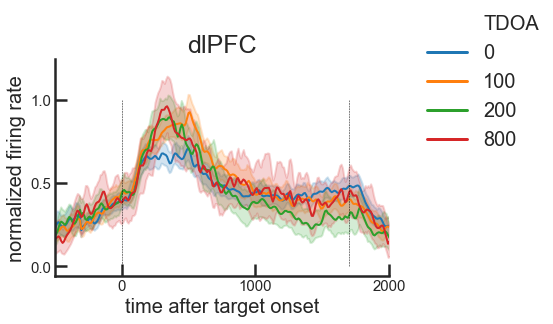

In [87]:
Pal = sns.color_palette("tab10")[:4]

df_best = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['neuron'].isin(perf_100_best))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA',  hue_order=[0,100,200,800], 
             data=df_best, palette=Pal, linewidth=2)



plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


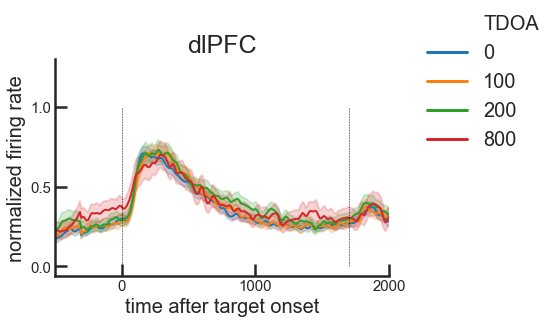

In [88]:
Pal = sns.color_palette("tab10")[:4]

df_best = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (~df['neuron'].isin(perf_100_best))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', hue_order=[0,100,200,800], 
             data=df_best, palette=Pal, linewidth=2)



plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

In [93]:
for TDOA in [0,100,200,800]:
    plt.figure()
    df_corr = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==TDOA) ]
    df_err = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==TDOA) ]

    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_corr, color='darkgreen',  linewidth=2)
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_err, color='darkred', linewidth=2)


    plt.xlim(-500, 2000)
    #plt.ylim(0,1)
    #plt.yticks([0,0.5,1])
    plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.title('dlPFC', fontsize=25)
    plt.ylabel('normalized firing rate', fontsize=20)
    plt.xlabel('time after target onset', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tilte('dlPFC, 'str(TDOA))

    plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
    plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)
    plt.show()

SyntaxError: invalid syntax (<ipython-input-93-11afa5c06271>, line 24)

In [ ]:
for TDOA in [0,100,200,800]:
    plt.figure()
    df_corr = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==TDOA)  & (df['neuron'].isin(perf_100_best)) ]
    df_err = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['TDOA']==TDOA) & (df['neuron'].isin(perf_100_best)) ]

    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_corr, color='darkgreen',  linewidth=2)
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_err, color='darkred', linewidth=2)


    plt.xlim(-500, 2000)
    #plt.ylim(0,1)
    #plt.yticks([0,0.5,1])
    plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.title('dlPFC', fontsize=25)
    plt.ylabel('normalized firing rate', fontsize=20)
    plt.xlabel('time after target onset', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tilte('sub. dlPFC, 'str(TDOA))

    plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
    plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)
    plt.show()

In [402]:
errors_speriatus = df.loc[ (df['brain_region']=='DLPFC') & (df['performance']==0) & (df['monkey']=='Speriatus')]
errors_speriatus.trial.unique()

array([200,  31, 149, 265,  36, 144, 249, 493, 686, 327,  26,  74, 119,
       130, 151, 167, 213, 219, 245, 289, 315, 350, 173, 218, 246, 394,
       434, 497, 549], dtype=int64)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


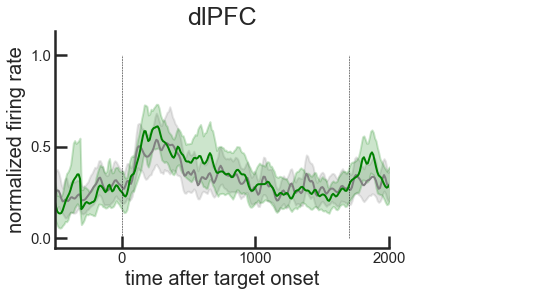

In [397]:
df_cont_pfc = df.loc[(df['TDconf'].isin([3,4])) & (df['brain_region']=='DLPFC') & (df['performance']==0)]
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_cont_pfc, color='grey', linewidth=2)

df_cont_pfc = df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & (df['performance']==0)]
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_cont_pfc, color='green', linewidth=2)

#df_pfc_100_less = df_100_pfc.loc[df_100_pfc['neuron'].isin(perf_100_best)]
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_less, color='darkgreen', linewidth=2)

plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

In [ ]:
## Two population or just one?

In [8]:
fifty = [  1367701,   1370202,   1371202,   1372301, 189168701, 189169502,
       189171003, 189171602, 189172801, 189173101, 189175201, 189175801,
       189176501, 189176901, 189177402, 189177701,   1891783,   1891793,
       189179702, 189180001, 189181001,   1891819, 189182202, 189182501,
       189182901, 189183201, 189183402, 189184601,   1891857, 189189601,
       189192001, 189192201, 189196301]

forty = [  1370202,   1372301, 189168701, 189169502, 189171003, 189173101,
       189175801, 189176501, 189177402,   1891783, 189179702, 189180001,
       189181001,   1891819, 189182202, 189182901, 189192201]

therty=[  1370202, 189173101, 189175801, 189176501,   1891783,   1891819,
       189192201]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


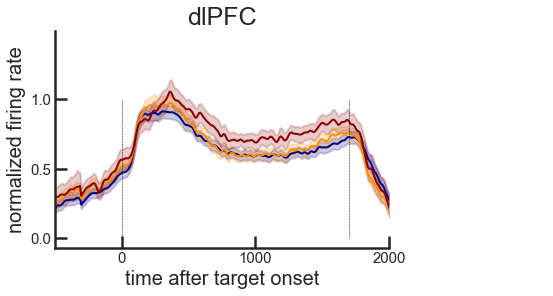

In [60]:
df_50= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(fifty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_50, color='darkblue', linewidth=2)



df_40 = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(forty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_40, color='darkorange', linewidth=2)


df_30 = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(therty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_30, color='darkred', linewidth=2)


#df_pfc_100_less = df_100_pfc.loc[df_100_pfc['neuron'].isin(perf_100_best)]
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_less, color='darkgreen', linewidth=2)

plt.xlim(-500, 2000)
#plt.ylim(0,1)
#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

In [6]:
## Pre and Post 

In [ ]:
pfc_=[]

for TDOA in [0,100, 200, 800]:
    cont_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                     (df['performance']==1) & (df['TDOA']==TDOA) & 
                     (~df['neuron'].isin(fifty)) & 
                     (df['time_centered']>TDOA) & (df['time_centered']<TDOA+100), 'norm_firing_gauss'].mean()
    
    for neuron in fifty:
            sub_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                     (df['performance']==1) & (df['TDOA']==TDOA) & 
                     (df['neuron']==neuron) & 
                     (df['time_centered']>TDOA) & (df['time_centered']<TDOA+100), 'norm_firing_gauss'].mean() 

            #pfc_.append([sub_, TDOA, 'subset', 'dlpfc'])
            #pfc_.append([cont_, TDOA, 'rest', 'dlpfc'])
            pfc_.append([sub_-cont_, TDOA, neuron, 'dlpfc'])

In [ ]:
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'neuron', 'area']
df_pfc

In [ ]:
sns.lineplot(x="TDOA", y="norm_firing_gauss", ci=68, color='darkblue',
             data=df_pfc, 
             marker="o")